<a href="https://colab.research.google.com/github/Gapinian/Network-Science-ICN-2024/blob/main/S6_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 6
## Computational complexity of network problems

# Problem 1


Corresponds to the restaurant problem discusses in class (how to choose the cuisine for a bunch of restaurant locations operated by the same company when it is known which ones share a significant amount of clientele).

**Graph coloring**

*   [Wikipedia in English](https://en.wikipedia.org/wiki/Graph_coloring)
*   [Wikipedia en français](https://fr.wikipedia.org/wiki/Coloration_de_graphe)
*   [Wikipedia en español](https://es.wikipedia.org/wiki/Coloraci%C3%B3n_de_grafos)



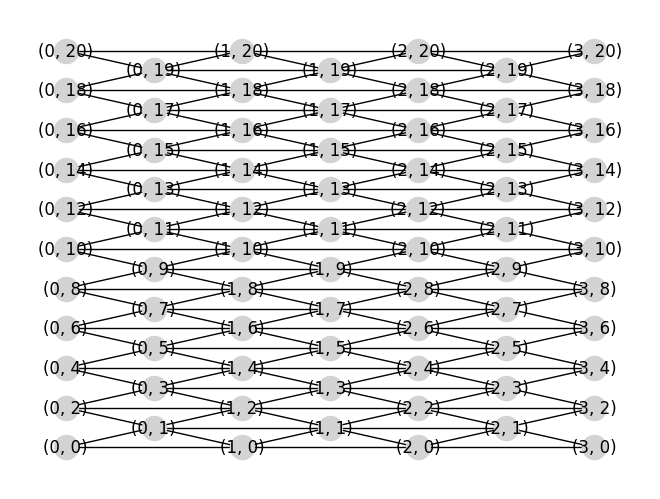

In [103]:
import networkx as nx
from random import random

pos = { i: (random(), random()) for i in range(n) }
G = nx.generators.lattice.triangular_lattice_graph(20, 5)

coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = 'lightgray')
l = nx.draw_networkx_labels(G, pos = coords)

In [104]:
result = nx.coloring.greedy_color(G, strategy = 'largest_first')
print(result)

{(1, 1): 0, (1, 2): 1, (2, 2): 2, (1, 3): 0, (1, 4): 1, (2, 4): 2, (1, 5): 0, (1, 6): 1, (2, 6): 2, (1, 7): 0, (1, 8): 1, (2, 8): 2, (1, 9): 0, (1, 10): 1, (2, 10): 2, (1, 11): 0, (1, 12): 1, (2, 12): 2, (1, 13): 0, (1, 14): 1, (2, 14): 2, (1, 15): 0, (1, 16): 1, (2, 16): 2, (1, 17): 0, (1, 18): 1, (2, 18): 2, (1, 19): 0, (0, 1): 2, (2, 1): 1, (0, 3): 2, (2, 3): 1, (0, 5): 2, (2, 5): 1, (0, 7): 2, (2, 7): 1, (0, 9): 2, (2, 9): 1, (0, 11): 2, (2, 11): 1, (0, 13): 2, (2, 13): 1, (0, 15): 2, (2, 15): 1, (0, 17): 2, (2, 17): 1, (0, 19): 2, (2, 19): 1, (1, 0): 1, (2, 0): 2, (1, 20): 1, (2, 20): 2, (0, 2): 0, (3, 2): 0, (0, 4): 0, (3, 4): 0, (0, 6): 0, (3, 6): 0, (0, 8): 0, (3, 8): 0, (0, 10): 0, (3, 10): 0, (0, 12): 0, (3, 12): 0, (0, 14): 0, (3, 14): 0, (0, 16): 0, (3, 16): 0, (0, 18): 0, (3, 18): 0, (0, 0): 0, (3, 0): 0, (0, 20): 0, (3, 20): 0}


In [105]:
used = set(result.values())
print(used)
count = len(used)

{0, 1, 2}


In [106]:
import seaborn as sns

In [107]:
colors = sns.color_palette('husl', count)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]

In [108]:
ca = []
for v in G.nodes():
  ca.append(colors[result[v]])
print(ca[:3])

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.3126890019504329, 0.6928754610296064, 0.1923704830330379), (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]


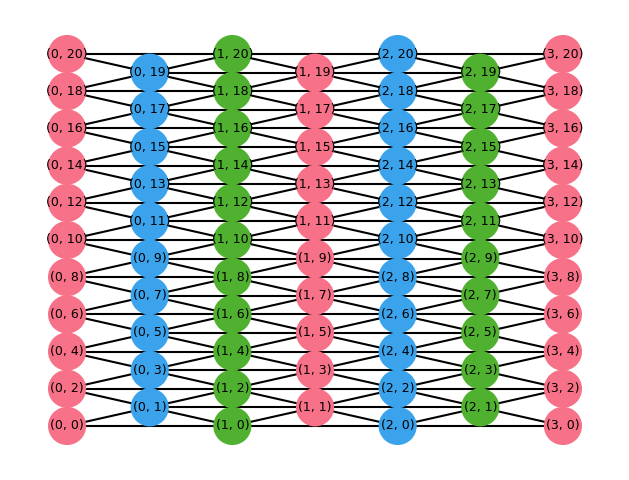

In [109]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = ca)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

# Problem 2

Corresponds to the problem of connecting a set of residential buildings with fiber optics and using as little cable as possible, as discussed in class.

**Minimum spanning tree**

*   [Wikipedia in English](https://en.wikipedia.org/wiki/Minimum_spanning_tree)
*   [Wikipedia en français](https://fr.wikipedia.org/wiki/Arbre_couvrant_de_poids_minimal)
*   [Wikipedia en español](https://es.wikipedia.org/wiki/%C3%81rbol_recubridor_m%C3%ADnimo)

In [113]:
n = 15 # order
r = 0.45 # radius
G = nx.generators.random_graphs.barabasi_albert_graph(n, 5)

mst = nx.minimum_spanning_tree(G, weight = "cost", algorithm = "kruskal")
print(G, 'MST', mst)

Graph with 15 nodes and 50 edges MST Graph with 15 nodes and 14 edges


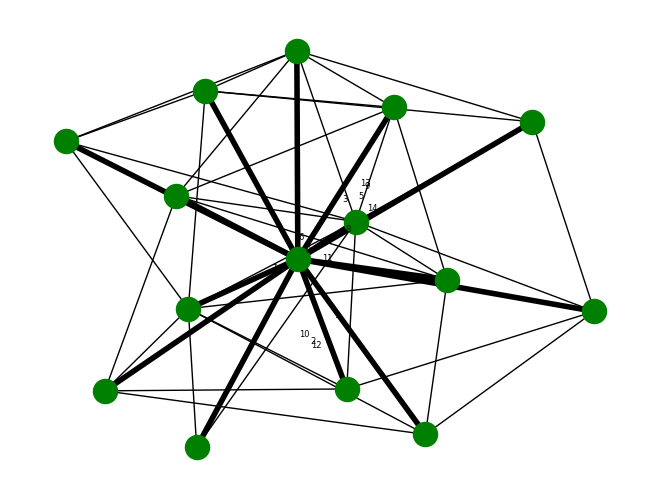

In [119]:
both = []
for e in mst.edges:
  both.append(e)
  (s, t) = e
  both.append((t, s))

layout = nx.spectral_layout(G)
thick = 4
thin = 1
ew = [ thick if e in both else thin for e in G.edges() ]

nx.draw(G, node_color = 'green', width = ew)
l = nx.draw_networkx_labels(G, pos = layout, font_size = 6)

# Problem 3

Corresponds to the vehicular traffic capacity maximization between a residential neighborhood and a huge factory that was discussed in class.

**Network flow**

*   [Wikipedia in English](https://en.wikipedia.org/wiki/Flow_network)
*   [Wikipedia en français](https://fr.wikipedia.org/wiki/R%C3%A9seau_de_flot)
*   [Wikipedia en español](https://es.wikipedia.org/wiki/Red_de_flujo)

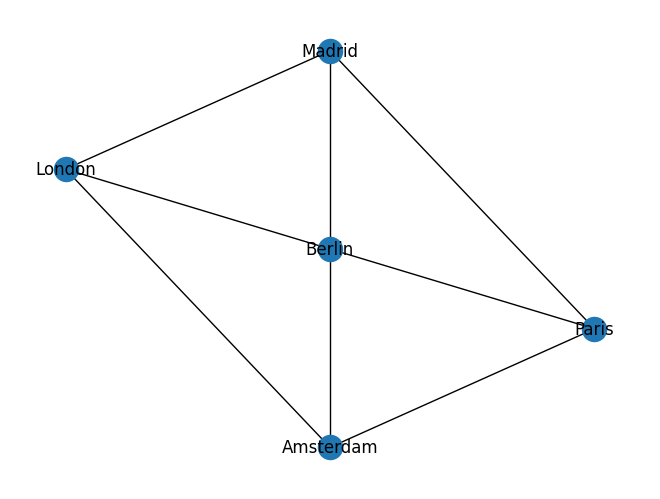

In [161]:
G = nx.Graph()
G.add_edge('Paris', 'Amsterdam', capacity = 7)
G.add_edge('Paris', 'Madrid', capacity = 5)
G.add_edge('Paris', 'Berlin', capacity = 1)
G.add_edge('Berlin', 'London', capacity = 8)
G.add_edge('Amsterdam', 'London', capacity = 3)
G.add_edge('Madrid', 'London', capacity = 3)
G.add_edge('Madrid', 'Berlin', capacity = 4)
G.add_edge('Berlin', 'Amsterdam', capacity = 7)
layout = nx.spectral_layout(G)
nx.draw(G, pos = layout)
l = nx.draw_networkx_labels(G, pos = layout)

In [162]:
maxflow = nx.maximum_flow(G, 'Paris', 'London')
value = maxflow[0] # maximum flow in units
config = maxflow[1] # a dictionary of the flow on each edge (as an adjacency list)

In [163]:
status = dict()
for v in config:
  for (u, units) in config[v].items():
    if units > 0:
      G[v][u]['flow'] = units
      cap = G[v][u]['capacity']
      status[(u, v)] = f'{units}/{cap}'

0 3 ['Paris', 'Amsterdam', 'Madrid', 'Berlin', 'London']


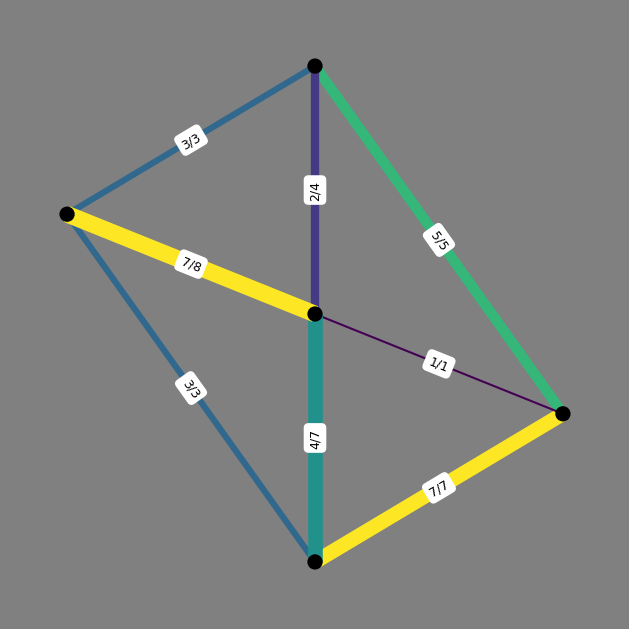

In [165]:
f = [ G[u][v]['capacity'] for u, v in G.edges ]
c = [ G[u][v].get('flow', 0) for u, v in G.edges ]

(s, t) = pair
print(s, t, G.nodes)
Vc = [ 'cyan' if v == s else ('hotpink' if v == t else 'black') for v in G.nodes ]

fig = plt.figure(1, figsize = (4, 4), dpi =  150)
nx.draw(G, pos = layout, width = f, node_size = 40, node_color = Vc, edge_color = c, cmap = plt.cm.Greens)
nx.draw_networkx_edge_labels(G, layout, status, font_size = 6)
fig.set_facecolor('gray')
plt.show()

# Problem 4

Extra problem for independent study

**Travelling salesperson problem** (TSP)

*   [Wikipedia in English](https://en.wikipedia.org/wiki/Travelling_salesman_problem)
*   [Wikipedia en français](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce)
*   [Wikipedia en español](https://es.wikipedia.org/wiki/Problema_del_viajante)

In [ ]:
t = 20 # how many towns
G = nx.Graph()

for i in range(t):
  x = random()
  y = random()
  G.add_node(i, pos = (x, y)) # call the towns 0, 1, 2, ...

from math import sqrt

def distance(p1, p2):
  (x1, y1) = p1
  (x2, y2) = p2
  return sqrt((x1 - x2)**2 + (y1 - y2)**2)

for t1 in G.nodes:
  l1 = G.nodes[t1]['pos']
  for t2 in G.nodes:
    if t1 != t2:
      l2 = G.nodes[t2]['pos']
      cost = distance(l1, l2)
      G.add_edge(t1, t2, weight = cost)

In [ ]:
c = nx.approximation.traveling_salesman_problem(G)
print(c)

[0, 8, 7, 4, 12, 6, 2, 11, 9, 14, 5, 17, 18, 15, 3, 10, 1, 13, 16, 19, 0]


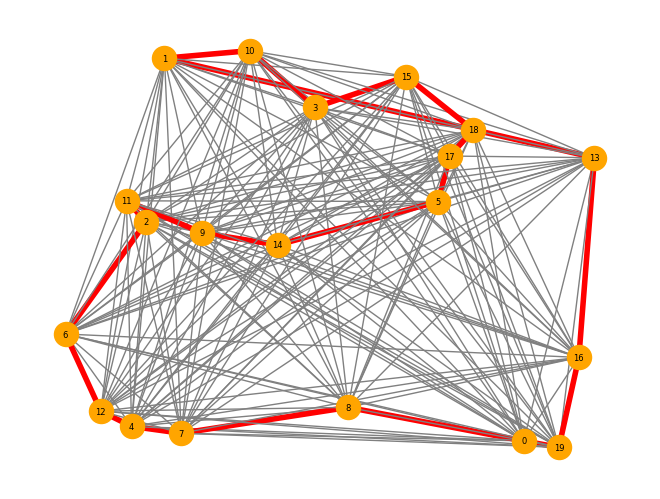

In [ ]:
used = []
v = None
w = None
for u in c:
  if v is None:
    v = u
  elif w is None:
    w = u
  else:
    used.append((v, w))
    v, w = w, u
used.append((v, w))
used.append((w, c[0]))

both = []
for e in used:
  both.append(e)
  (s, t) = e
  both.append((t, s))

thick = 4
thin = 1
ew = [ thick if e in both else thin for e in G.edges() ]
ec = [ 'red' if e in both else 'gray' for e in G.edges() ]

coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = 'orange', width = ew, edge_color = ec)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)